#MNIST CV Project - DNN & ConvNet Basics

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Import Libs
 - Tensorflow as tf
 - keras
 - numpy
 - matplotlib.pyplot as plt
 - from keras import backend as K

In [0]:
import tensorflow as tf
import keras as kr
from keras import backend as K

#Helper Libs
import numpy as np
import matplotlib.pyplot as plt



##Init variable
 - batch_size 
 - num_classes 
 - epochs 

 - input image dimensions

In [0]:
batch_size = 128
num_classes = 10
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

#Gather Data
Download Dataset from [Keras Dataset](https://keras.io/datasets/)

tf.keras.datasets.mnist

Use load_data() to split:
- train_input & train_output
- test_input & test_output

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

##Non-Normalized Img: 
Plot one of the sample img and its coresponding ground truth

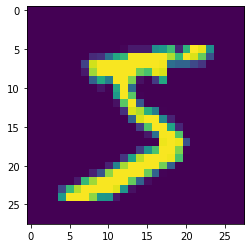

In [87]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar
plt.grid(False)
plt.show()

##Normalization: 
Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

##Reshape Data
 - number of image
 - color scale
 - pixel x dimension
 - pixel y dimension

In [0]:

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

##Normalization
 - .astype -> float32
 - Divided by 255 to grey scale

In [89]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


##Convert class vectors to binary class matrices
Use [keras.utils.to_categorical](https://keras.io/utils/)

In [90]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

y_train[:4]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#Build Model
Challenge - Building a ConvNet
- Input Layer: [Conv2D](https://keras.io/layers/convolutional/#conv2d), 32 nodes, kernel size 3x3, activation = relu, input shape = input_shape
- Hidden Layer 1: Conv2D, 64 nodes, kernel size = 3x3, activation = relu
- Hidden Layer 2: [MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d), Pool size = 2x2
- Hidden Layer 3: [Dropout](https://keras.io/layers/core/#dropout), rate = 0.25
- Hidden Layer 4: [Flatten](https://keras.io/layers/core/#flatten) to fc
- Hidden Layer 5: Dense, 128 nodes, activation = relu
- Hidden Layer 6: Dropout, rate = 0.5
- Output Layer: Dense, 10 nodes, softmax


In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  
  model.add(tf.keras.layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape = input_shape))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
  model.add(tf.keras.layers.Dropout(0.25))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
  return model

##Compile model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

1. Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

2. Optimizer —This is how the model is updated based on the data it sees and its loss function.

3. Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [0]:
model = create_model()
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Optional: Check Model Summary 

In [96]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.

In [0]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

#Evaluate Model

[Keras Evaluate Model](https://keras.io/models/model/#evaluate)

In [0]:
score = model.evaluate(x_test, y_test, verbose=1)



#Predict
[Keras Predic](https://keras.io/models/model/#predict)
 Predict first 4 imgs in x_test

In [0]:
Predict_result = model.predict(x_test[:4])

print(Predict_result)

y_test[:4]

#Visualize Prediction

In [0]:

(x_train_b, y_train_b),(x_test_b, y_test_b) = mnist.load_data()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_b[i], cmap=plt.cm.binary)
    plt.xlabel(y_test_b[i])
plt.show()

[Reference_ConvNet_MINSTT](https://keras.io/examples/mnist_cnn/)